## 9.5 사이파이를 사용한 검정

앞 절에서 검정 방법을 공부하고 통계량분포의 누적분포함수를 사용하여 유의확률을 계산하는 방법을 살펴보았다. 사이파이 패키지는 다음과 같은 다양한 검정 명령을 제공한다. 따라서 사이파이 패키지를 사용하면 여러분이 직접 통계량을 계산하거나 통계량분포의 누적분포함수로 유의확률을 계산할 필요가 없다. 또한 검정으로 내린 결론이 틀린 경우인 1종오류와 2종오류에 대해서도 살펴본다.

* 이항검정(Binomial Test)
* 카이제곱검정(Chi-squared Test)
* 카이제곱 독립검정(Chi-squared Contingency Test)
* 단일표본 z검정(One-sample z-Test)
* 단일표본 t검정(One-sample t-Test)
* 독립표본 t검정(Independent two-sample t-Test)
* 대응표본 t검정(Paired two-sample t-Test)
* 등분산검정(Equal-variance Test)
* 정규성검정(Normality Test)



### 이항검정

이항검정은 이항분포를 이용하여 베르누이 확률변수의 모수 $\mu$에 대한 가설을 조사하는 검정 방법이다. 사이파이 stats 서브패키지의 `binom_test` 명령은 이항검정의 유의확률을 계산한다. 디폴트 귀무가설은 $\mu = 0.5$이다.

```
scipy.stats.binom_test(x, n=None, p=0.5, alternative='two-sided')
```

* `x`: 검정통계량. 1이 나온 횟수
* `n`: 총 시도 횟수
* `p`: 귀무가설의 $\mu$값
* `alternative`: 양측검정인 경우에는 `'two-sided'`, 단측검정인 경우에는 `'less'` 또는 `'greater'`


#### 예제 

실제 모수 $\mu_0=0.5$인 베르누이 확률 변수의 시뮬레이션을 통해 이항검정을 실습해보자. 데이터 개수 $N=10$일 때 1이 나온 횟수가 7이다.

In [1]:
N = 10
mu_0 = 0.5
np.random.seed(0)
x = sp.stats.bernoulli(mu_0).rvs(N)
n = np.count_nonzero(x)
n

7

모수가 0.5인 베르누이 분포라면 가장 가능성이 높은 5가 나와야 하는데 여기에는 7이 나왔다. 그렇다면 이 확률변수의 모수는 0.5가 아니라 0.7일까? 모수가 0.5라는 귀무가설의 신빙성을 확인하기 위해 `binom_test` 이항검정 명령으로 유의확률을 구하면 약 34%이다.

In [2]:
sp.stats.binom_test(n, N)

0.3437499999999999

유의확률이 높으므로 모수가 0.5라는 귀무가설을 기각할 수 없다.

#### 예제

이항검정은 **두 가지 값을 가지는 확률변수의 분포를 판단**하는데 도움을 준다. 예를 들어 위에서 사용한 데이터가 사실은 어떤 자격시험 합격자 10명 중 7명이 대학졸업자라는 것을 뜻하는 데이터였다고 하자. 그렇다면 이 데이터로부터 '대학졸업자가 비졸업자보다 실력이 좋다'고 주장할 수 있는가? 

합격자의 대학졸업 유무가 베르누이 확률분포로 결정되는 값이라고 가정하자. 만약 베르누이 확률분포의 모수가 0.5이면 대학졸업자와 비졸업자의 실력은 같은 것이다.
위의 검정 결과에서 보듯이 대학졸업자와 비졸업자 동등한 실력을 가진 경우에도 7명 혹은 그보다 더 많은 대학졸업자가 합격할 확률인 유의확률은 34%나 된다. 따라서 '대학졸업자가 비졸업자보다 실력이 좋다'는 주장은 유의하지 않다.

#### 예제

$\mu=0.5$라고 생각되는 확률변수에서 데이터 개수 $N=100$번 시뮬레이션하여 1이 49번 나온 경우 대해 이항검정을 실시해보자.

In [3]:
N = 100
mu_0 = 0.5
np.random.seed(0)
x = sp.stats.bernoulli(mu_0).rvs(N)
n = np.count_nonzero(x)
n

49

In [4]:
sp.stats.binom_test(n, N)

0.9204107626128206

유의확률이 92%로 높으므로 귀무가설을 기각할 수 없다. 따라서 $\mu=0.5$다.

#### 예제

이번에는 실제 모수 $\mu_0=0.35$인 경우에 대해 시뮬레이션을 했더니 1이 100번 중 31번 나왔다.

In [5]:
N = 100
mu_0 = 0.35
np.random.seed(0)
x = sp.stats.bernoulli(mu_0).rvs(N)
n = np.count_nonzero(x)
n

31

이 결과를 귀무가설 $H_0: \mu = 0.5$로 이항검정 명령을 실시하면 유의확률은 0.018%이다.

In [6]:
sp.stats.binom_test(n, N)

0.00018314322488235352

유의확률이 낮으므로 귀무가설을 기각할 수 있다. 따라서 $\mu \neq 0.5$다. 이는 우리가 시뮬레이션한 진실과 일치한다.

#### 연습 문제 9.5.1

동전을 $N$번 던져 앞면이 나오는 횟수를 측정했다. 다음 질문에 답하여라.

1. $N=10$이고  유의 수준이 10%라면 앞면이 나온 횟수가 몇 번이어야 동전이 공정하지 않다고 이야기 할 수 있을까?
2. $N=1000$이고  유의 수준이 10%라면 앞면이 나온 횟수가 몇 번이어야 동전이 공정하지 않다고 이야기 할 수 있을까? 이 때 $1\sim N$의 횟수 범위 중에서 동전이 공정하다고 이야기할 수 있는 횟수의 범위(비율)는 $N=10$일 때와 비교하여 넓은가 혹은 좁은가?

#### 연습 문제 9.5.2

다음 코드를 실행하면 어느 식당의 매출과 팁(tip) 데이터를 구할 수 있다. 

```
import seaborn as sns
tips = sns.load_dataset("tips")
```

하나의 레코드(행)이 한 명의 손님을 나타낸다고 가정하자. 열마다 성별(sex), 흡연유무(smoker), 점심/저녁(time) 등을 나타내는 데이터가 있다. 

이항검정을 사용하여 다음 문제를 풀어라. 유의수준은 10%다.

1. 여자 손님 중 비흡연자가 흡연자보다 많다고 할 수 있는가?
2. 저녁에 오는 여자 손님 중 비흡연자가 흡연자보다 많다고 할 수 있는가?

#### 연습 문제 9.5.3 

어떤 주제에 대해 찬반을 묻는 설문조사를 실시했고 설문조사 결과 응답자의 70%가 찬성이라는 결과가 나왔다. 전체 국민의 삼분의 이(2/3)가 넘게 찬성한다는 결론을 유의수준 1%에서 얻기 위해 필요한 응답자수는 얼마인가? 단 응답자수가 바뀌어도 찬성 70%라는 결과는 바뀌지 않는다고 가정한다.

### 카이제곱검정

앞에서 베르누이분포의 모수에 대해 검정을 하려면 베르누이분포 표본의 합이라는 통계량이 이항분포를 따른다는 성질을 이용하면 된다고 배웠다. 그러면 카테고리분포의 모수에 대해 검정을 하려면 카테고리분포 표본의 합이라는 통계량이 다항분포를 따른다는 성질을 이용할 수 있을까?

결론을 말하자면 통계량으로 카테고리분포 표본의 합은 이용할 수 없다. 왜냐하면 이 통계량은 스칼라가 아닌 벡터값을 가지기 때문이다. 이 때는 **카이제곱검정(Chi-squared test)**이라는 방법을 사용한다.

카이제곱검정은 범주형 확률분포의 모수 $\mu=(\mu_1, \ldots, \mu_K)$에 대한 가설을 조사하는 검정 방법으로 **적합도검정(goodness of fit test)**이라고도 부른다. 원래 범주형 값 $k$가 나와야 할 횟수의 기댓값 $m_k$와 실제 나온 횟수 $x_k$의 차이를 이용하여 다음처럼 검정통계량을 구한다.

$$
\begin{align}
\sum_{k=1}^K \dfrac{(x_k - m_k)^2}{m_k}
\tag{9.5.1}
\end{align}
$$

사이파이 stats 서브패키지의 `chisquare` 명령은 카이제곱검정의 검정통계량과 유의확률을 계산한다. `f_exp`이 주어지지 않는 경우의 디폴트 귀무가설은 $\mu = \left(\frac{1}{K}, \ldots, \frac{1}{K} \right)$이다.

`scipy.stats.chisquare(f_obs, f_exp=None)`
* `f_obs` : 데이터 행렬
* `f_exp` : 기댓값 행렬
  

#### 예제

데이터 개수 $N=10$, 귀무가설 모수 $\mu_0=(0.25, 0.25, 0.25, 0.25)$, 실제 데이터 $(0, 3, 5, 2)$인 경우 대해 카이제곱검정 명령을 실시해보자.

In [7]:
N = 10
K = 4
mu_0 = np.ones(K)/K
np.random.seed(0)
x = np.random.choice(K, N, p=mu_0)
n = np.bincount(x, minlength=K)
n

array([0, 3, 5, 2])

In [8]:
sp.stats.chisquare(n)

Power_divergenceResult(statistic=5.199999999999999, pvalue=0.157724450396663)

유의확률이 17.8%로 높으므로 귀무가설을 기각할 수 없다. 따라서 $\mu_0=(0.25, 0.25, 0.25, 0.25)$다.

#### 예제

이번에는 데이터 개수 $N=100$, 귀무가설  모수 $\mu_0=(0.25,0.25,0.25,0.25)$, 실제 데이터 $(37, 32, 20, 11)$인 경우 대해 카이제곱검정 명령을 실시해보자.

In [9]:
N = 100
K = 4
mu_0 = np.array([0.35, 0.30, 0.20, 0.15])
np.random.seed(0)
x = np.random.choice(K, N, p=mu_0)
n = np.bincount(x, minlength=K)
n

array([37, 32, 20, 11])

In [10]:
sp.stats.chisquare(n)

Power_divergenceResult(statistic=16.56, pvalue=0.0008703471978912127)

유의확률이 0.087%이므로 귀무가설을 기각할 수 있다. 따라서 $\mu \neq (0.25,0.25,0.25,0.25)$다.

#### 연습 문제 9.5.4

6면체 주사위를 5번 던졌다. 5번 모두 6이 나왔다면 주사위가 공정하다는 귀무가설의 유의확률은 얼마인가?

### 카이제곱  독립검정

**카이제곱검정은 어떤 범주형 확률변수 $X$가 다른 범주형 확률변수 $Y$와 독립인지 상관관계를 가지는가를 검증**하는데도 사용할 수 있다. 카이제곱검정을 독립을 확인하는데 사용하면 카이제곱 독립검정이라고 부른다.

확률변수 $X$와 $Y$가 독립이라면 결합 확률질량함수 $P(x, y)$는 각 확률변수 $X$와 $Y$의 주변 확률밀도함수 $P(x)$, $P(y)$의 곱이다. 예를 들어 다음과 같은 확률분포는 가진다면  $X$와 $Y$는 독립이다.

<html>
    <table>
        <tr><td></td><td>P(Y=0)=0.3</td><td>P(Y=1)=0.7</td></tr>
        <tr><td>P(X=0)=0.4</td><td>0.12</td><td>0.28</td></tr>
        <tr><td>P(X=1)=0.6</td><td>0.18</td><td>0.42</td></tr>
    </table>
</html>

이런 확률변수의 표본을 측정하여 그 횟수를 표로 나타낸 것을 분할표(contingency table)라고 한다. 예를 들어 50개의 표본을 측정한 분할표가 다음과 같다면 확률변수 $X$와 $Y$가 독립이라고 주장할 수 있을 것이다.

<html>
    <table>
        <tr><td></td><td>Y=0</td><td>Y=1</td></tr>
        <tr><td>X=0</td><td>6</td><td>14</td></tr>
        <tr><td>X=1</td><td>9</td><td>21</td></tr>
    </table>
</html>

그런데 만약 분할표가 다음과 같다면 독립일까 독립이 아닐까? 원래 독립인데 표본오차에 의해 약간의 차이가 생긴 것인지 아니면 원래부터 독립이 아니라서 저런 결과가 나온 것일까?

<html>
    <table>
        <tr><td></td><td>Y=0</td><td>Y=1</td></tr>
        <tr><td>X=0</td><td>5</td><td>15</td></tr>
        <tr><td>X=1</td><td>10</td><td>20</td></tr>
    </table>
</html>

이 문제는 카이제곱검정을 사용하여 풀 수 있다. 만약 두 확률변수가 독립이라면 $X=0$일 때의 $Y$분포와 $X=1$일 때의 $Y$분포가 같아야 한다. 따라서 두 경우의 표본 집합이 같은 확률분포에서 나왔다는 것을 귀무가설로 하는 카이제곱검정을 하여 채택된다면 두 확률변수는 독립이다. 만약 기각된다면 두 확률변수는 상관관계가 있다.

사이파이의 ``chi2_contingency()`` 명령은 이러한 검정을 수행한다. $X$의 값에 따른 각각의 $Y$분포가 2차원 표(contingency table)의 형태로 주어지면 독립인 경우의 분포와 실제 y 표본본포의 차이를 검정통계량으로 계산한다. 이 값이 충분히 크다면 $X$와 $Y$는 상관관계가 있다. ``chi2_contingency()`` 명령의 결과는 튜플로 반환되며 첫번째 값이 검정통계량, 두번째 값이 유의확률이다.

In [11]:
obs = np.array([[5, 15], [10, 20]])
sp.stats.chi2_contingency(obs)

(0.0992063492063492, 0.7527841326498471, 1, array([[ 6., 14.],
        [ 9., 21.]]))

이 때 카이제곱 독립검정의 유의확률은 75%다. 즉 $X$와 $Y$는 상관관계가 있다고 말할 수 없다.

#### 연습 문제 9.5.5

예를 들어 데이터 사이언스 스쿨 수업을 들었는가의 여부가 나중에 대학원에서 머신러닝 수업의 학점과 상관관계가 있는지를 알기 위해 데이터를 구한 결과가 다음과 같다고 하자.

* 데이터 사이언스 스쿨 수업을 듣지 않은 경우 즉, $X$가 0이면 A, B, C 학점($Y$ 값)을 받은 학생의 분포가 $4, 16, 20$이다.
* 데이터 사이언스 스쿨 수업을 들은 사람의 경우 즉, $X$가 1일 때 A, B, C 학점($Y$ 값)을 받은 학생의 분포가 $23, 18, 19$다.

이 결과로부터 데이터 사이언스 스쿨 수업을 들었는가의 여부가 머신러닝 수업의 학점과 상관관계가 있다고 말할 수 있는가?

### 단일표본 z검정 

**단일표본 z검정(One-sample z-test)**은 분산 $\sigma^2$의 값을 정확히 알고 있는 정규분포의 표본에 대해 기댓값을 조사하는 검정방법이다. 단일표본 z검정의 경우에는 많이 사용되지 않고 사이파이에 별도의 함수가 준비되어 있지 않으므로 `norm` 명령의 `cdf` 메서드를 사용하여 직접 구현해야 한다.

#### 예제

실제 모수 $\mu_0=0$, $\sigma^2=1$인 경우 대해 표본 데이터 $N=10$개를 시뮬레이션으로 구하여 귀무가설 $\mu_0=0$에 대한 단일표본 z검정 명령을 실시해보자.

In [12]:
N = 10
mu_0 = 0
np.random.seed(0)
x = sp.stats.norm(mu_0).rvs(N)
x

array([ 1.76405235,  0.40015721,  0.97873798,  2.2408932 ,  1.86755799,
       -0.97727788,  0.95008842, -0.15135721, -0.10321885,  0.4105985 ])

단일표본 z검정 함수를 다음처럼 구현할 수 있다. 이 함수는 검정통계량과 유의확률을 튜플형태로 반환한다.

In [13]:
def ztest_1samp(x, sigma2=1, mu=0):
    z = (x.mean() - mu) / np.sqrt(sigma2/len(x))
    return z, 2 * sp.stats.norm().sf(np.abs(z))

ztest_1samp(x)

(2.3338341854824276, 0.019604406021683538)

만약 유의 수준이 5%면 유의확률이 1.96%이므로 귀무가설을 기각할 수 있다. 따라서 $\mu \neq 0$이다. 이 경우는 검정 결과가 오류인 예다. 검정 결과가 오류로 나온 이유는 데이터 수가 10개로 부족하기 때문이다.
이러한 오류는 귀무가설이 진실임에도 불구하고 기각된 경우로 **1종오류(Type 1 Error)**라고 한다. 1종오류가 나오려면 귀무가설이 진실이지만 유의확률은 유의수준보다 작아야한다. **1종오류가 나올 확률은 유의수준과 같다.**

데이터 개수 $N=100$, 실제 모수 $\mu_0=0$인 경우 대해 단일표본 z검정 명령을 실시해보자.

In [14]:
N = 100
mu_0 = 0
np.random.seed(0)
x = sp.stats.norm(mu_0).rvs(N)
ztest_1samp(x)

(0.5980801553448499, 0.5497864508624168)

유의확률이 54.98%이므로 귀무가설을 기각할 수 없다. 따라서 $\mu = 0$이다. 

### 단일표본 t검정

**단일표본 t검정(One-sample t-test)**은 정규분포의 표본에 대해 기댓값을 조사하는 검정방법이다. 검정통계량으로 스튜던트 t분포를 가진 t통계량을 사용한다.

$$
\begin{align}
\dfrac{\bar{x} - \mu_0}{\dfrac{s}{\sqrt{N}}}
\tag{9.5.2}
\end{align}
$$

이 식에서 $\bar{x}$는 표본평균, $s$는 표본표준편차다.

사이파이의 stats 서브 패키지의 `ttest_1samp` 명령을 사용한다.  `ttest_1samp` 명령의 경우에는 디폴트 모수가 없으므로 기댓값을 나타내는 `popmean` 인수를 직접 지정해야 한다.

`scipy.stats.ttest_1samp(a, popmean)`

* `a`: 표본 데이터 배열
* `popmean`: 귀무가설의 기댓값


데이터 개수 $N=10$, 실제 모수 $\mu_0=0$인 경우 대해 단일표본 t검정 명령을 실시해보자.

In [15]:
N = 10
mu_0 = 0
np.random.seed(0)
x = sp.stats.norm(mu_0).rvs(N)
sp.stats.ttest_1samp(x, popmean=0)

Ttest_1sampResult(statistic=2.28943967238967, pvalue=0.04781846490857058)

유의확률이 4.78%이므로 만약 유의 수준이 5% 이상 이라면 귀무가설을 기각할 수 있다. 따라서 $\mu \neq 0$다. 이 경우도 유형 1 오류의 예라고 볼 수 있다. 실제 모수 $\mu_0$가 $0$인데도 시뮬레이션 결과에 대한 검정 결과가 오류로 나온 이유는 데이터 수가 10개로 부족하기 때문이다.

이번에는 데이터의 개수 $N$이 $100$인 경우에 대해 단일표본 t검정 명령을 실시해보자.

In [16]:
N = 100
mu_0 = 0
np.random.seed(0)
x = sp.stats.norm(mu_0).rvs(N)
sp.stats.ttest_1samp(x, popmean=0)

Ttest_1sampResult(statistic=0.5904283402851698, pvalue=0.5562489158694675)

### 독립표본 t검정

**독립표본 t검정(Independent-two-sample t-test)**은 두 개의 독립적인 정규분포에서 나온 $N_1$, $N_2$개의 데이터 셋을 사용하여 두 정규분포의 기댓값이 동일한지를 검사한다. 

검정통계량으로는 두 정규분포의 분산이 같은 경우에는

$$
\begin{align}
t = \dfrac{\bar{x}_1 - \bar{x}_2}{s \cdot \sqrt{\dfrac{1}{N_1}+\dfrac{1}{N_2}}}
\tag{9.5.3}
\end{align}
$$

을 사용한다. 여기에서 $\bar{x}_1$, $\bar{x}_2$는 각각의 표본평균이고 표본표준편차 $s$는 각각의 표본분산 $s_1^2$, $s_2^2$로부터 다음처럼 구한다.

$$
\begin{align}
s = \sqrt{\dfrac{\left(N_1-1\right)s_{1}^2+\left(N_2-1\right)s_{2}^2}{N_1+N_2-2}}
\tag{9.5.4}
\end{align}
$$

이 통계량은 자유도가 $N_1 + N_2 − 2$인 스튜던트-t분포를 따른다.

두 정규분포의 분산이  다른 경우에는 검정통계량으로

$$
\begin{align}
t = \dfrac{\bar{x}_1 - \bar{x}_2}{\sqrt{\dfrac{s_1^2}{N_1} + \dfrac{s_2^2}{N_2}}}
\tag{9.5.5}
\end{align}
$$

를 사용한다. 이 값은 자유도(degree of freedom)가 다음과 같은 스튜던트-t분포를 따른다.

$$
\begin{align}
\text{dof} =
\dfrac{\left(\dfrac{s_1^2}{N_1} + \dfrac{s_2^2}{N_2}\right)^2}{\dfrac{\left(s_1^2/N_1\right)^2}{N_1-1} + \dfrac{\left(s_2^2/N_2\right)^2}{N_2-1}}
\tag{9.5.6}
\end{align}
$$

독립표본 t검정은 사이파이 stats 서브패키지의 `ttest_ind` 명령을 사용하여 계산한다. 독립표본 t검정은 두 정규분포의 분산값이 같은 경우와 같지 않은 경우에 사용하는 검정통계량이 다르기 때문에 `equal_var` 인수를 사용하여 이를 지정해 주어야 한다. 두 분포의 분산이 같은지 다른지는 다음에 나올 등분산검정(equal-variance test)을 사용하면 된다. 만약 잘 모르겠으면 `equal_var=False`로 놓으면 된다.

`scipy.stats.ttest_inds(a, b, equal_var=True)`

* `a`: 1번 표본 집합 데이터
* `b`: 2번 표본 집합 데이터
* `equal_var`: 두 표본 집합의 분산이 같은경우에는 `True`


#### 예제

두 정규분포의 기댓값이 $\mu_1 = 0$, $\mu_2 = 0.5$로 다르고  분산은 $\sigma_1 = \sigma_2 = 1$ 으로 같으며 표본의 수가 $N_1=N_2=10$인 경우를 시뮬레이션해보자. 우리는 분산 값이 정말 같은지 모르므로 일단 `equal_var=False`로 놓는다.

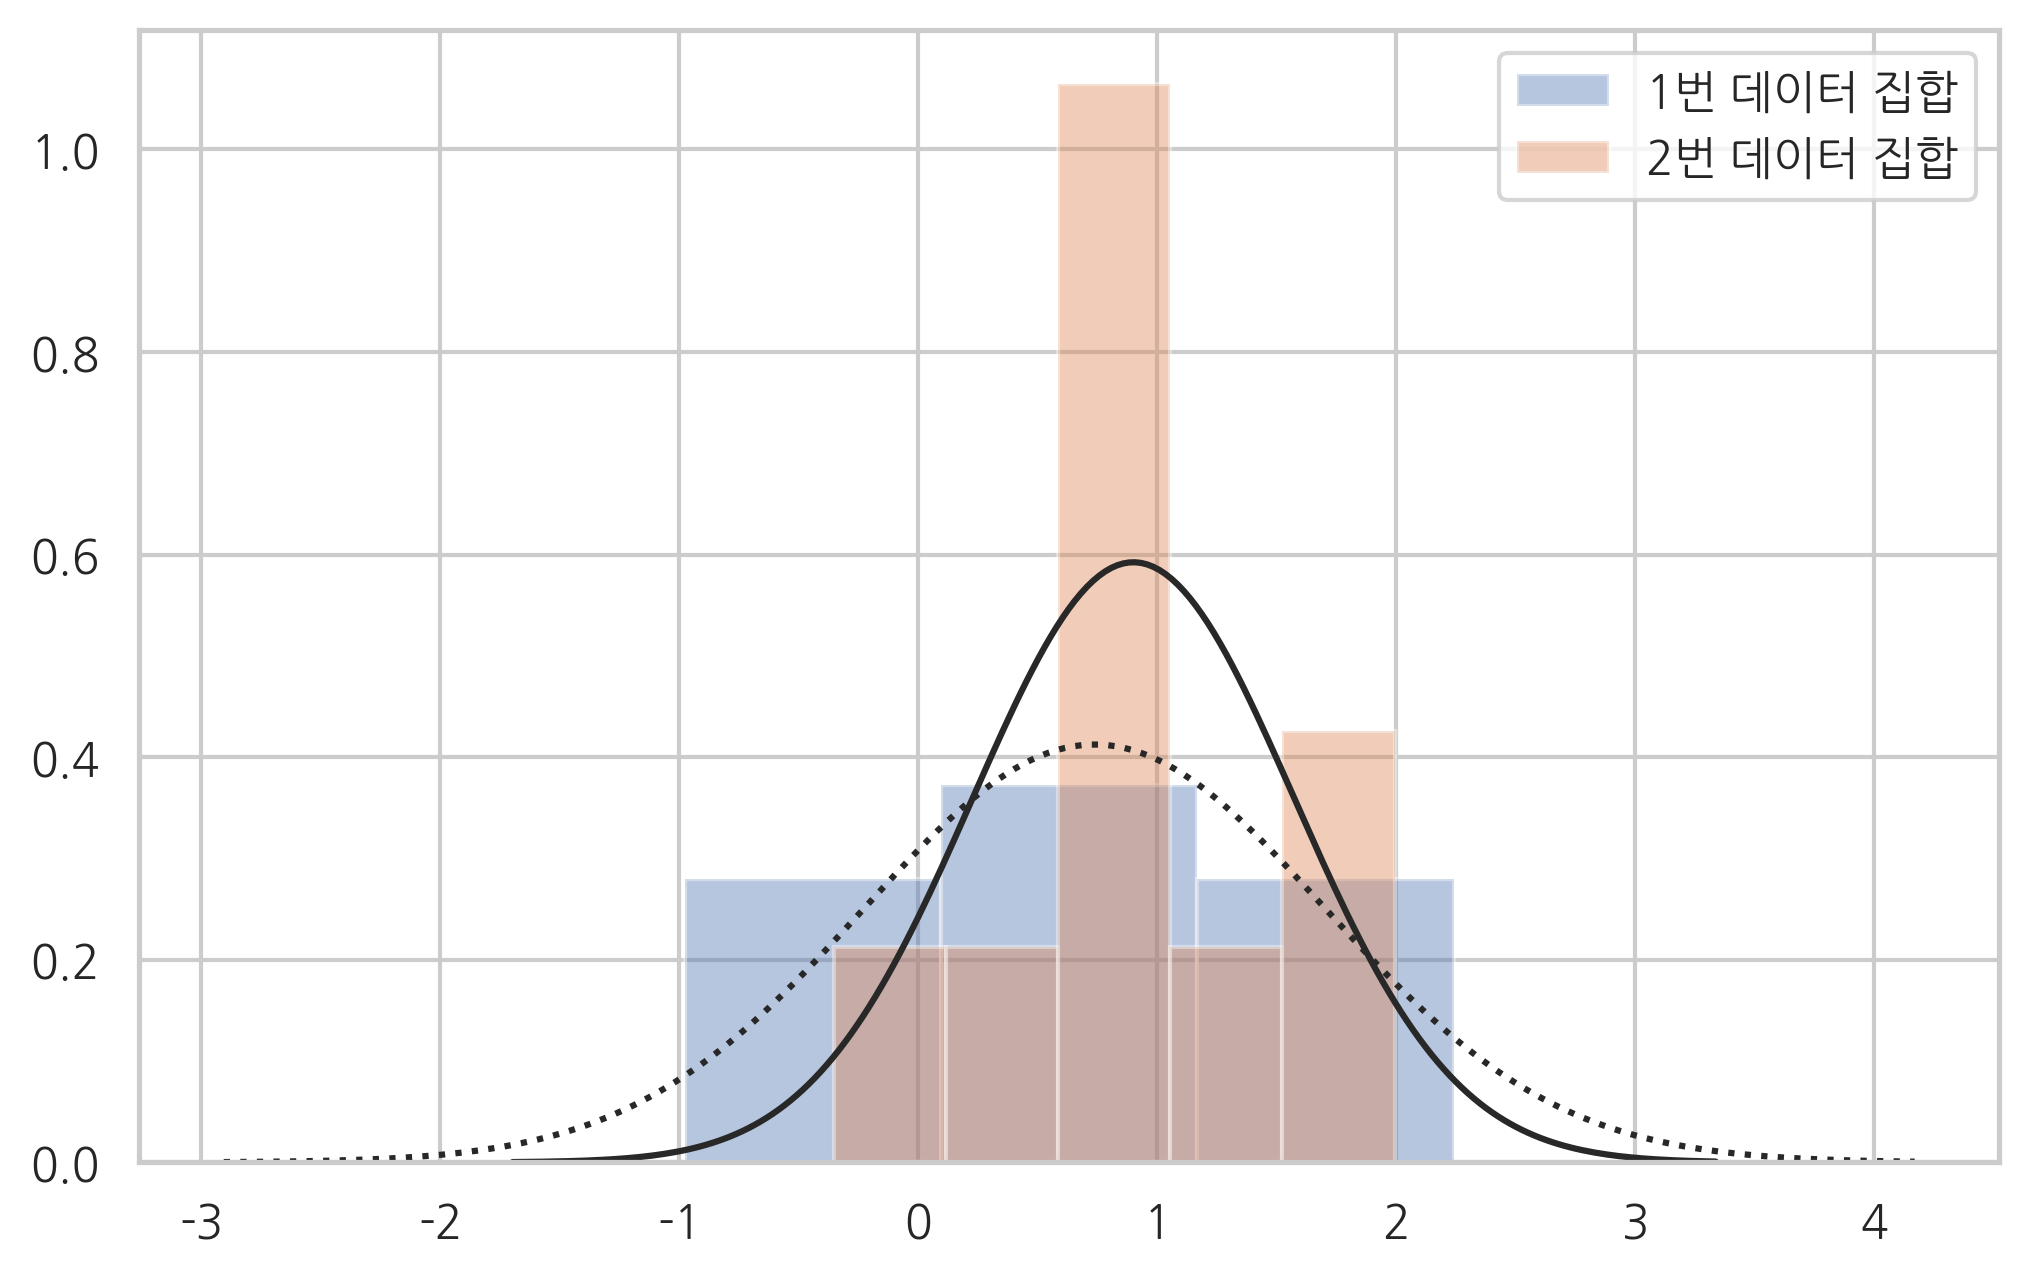

In [17]:
N_1 = 10
mu_1 = 0
sigma_1 = 1
N_2 = 10
mu_2 = 0.5
sigma_2 = 1
np.random.seed(0)
x1 = sp.stats.norm(mu_1, sigma_1).rvs(N_1)
x2 = sp.stats.norm(mu_2, sigma_2).rvs(N_2)
ax = sns.distplot(x1, kde=False, fit=sp.stats.norm, label="1번 데이터 집합")
ax = sns.distplot(x2, kde=False, fit=sp.stats.norm, label="2번 데이터 집합")
ax.lines[0].set_linestyle(":")
plt.legend()
plt.show()

이 두 표본집합의 표본평균은 각각 0.74, 0.9로 다르다.

In [18]:
np.mean(x1), np.mean(x2)

(0.7380231707288347, 0.9006460151624349)

하지만 t검정의 결과는 유의확률 68.4%이므로 두 기댓값이 같다는 귀무가설을 기각할 수 없다. 따라서 $\mu_1 = \mu_2$다. 

In [19]:
sp.stats.ttest_ind(x1, x2, equal_var=False)

Ttest_indResult(statistic=-0.4139968526988655, pvalue=0.6843504889824326)

시뮬레이션에 사용한 두 정규분포의 모수가 원래는 다르기 때문에 이 경우는 검정 결과가 오류인 또 다른 예다. 
이러한 오류는 귀무가설이 거짓임에도 불구하고 진실로 나온 경우로 **2종오류(Type 2 Error)**라고 한다.
데이터 수가 증가하면 이러한 오류가 발생할 가능성이 줄어든다.

#### 예제

데이터의 개수를 50개와 100개로 증가시킨 경우에 유의확률은 0.8%로 감소했다. 따라서 두 확률분포의 기댓값이 일치한다는 귀무가설은 기각할 수 있고 2종오류는 발생하지 않는다.

In [20]:
N_1 = 50
mu_1 = 0
sigma_1 = 1
N_2 = 100
mu_2 = 0.5
sigma_2 = 1
np.random.seed(0)
x1 = sp.stats.norm(mu_1, sigma_1).rvs(N_1)
x2 = sp.stats.norm(mu_2, sigma_2).rvs(N_2)
sp.stats.ttest_ind(x1, x2, equal_var=True)

Ttest_indResult(statistic=-2.6826951236616963, pvalue=0.008133970915722658)

#### 연습 문제 9.5.6

1반과 2반 학생 들의 성적이 각각 다음과 같다고 가정하자.

* 1반 : 80점, 75점, 85점, 50점, 60점, 75점, 45점, 70점, 90점, 95점, 85점, 80점. 평균 74.1점
* 2반 : 80점, 85점, 70점, 80점, 35점, 55점, 80점 . 평균 69.2점

1반의 실력이 2반보다 좋다고 이야기 할 수 있는가?

### 대응표본 t검정

대응표본 t검정(Paired-two-sample t-test)은 독립표본 t검정을 두 집단의 표본이 1대1 대응하는 경우에 대해 수정한 것이다. 즉, 독립표본 t검정과 마찬가지로 두 정규분포의 기댓값이 같은지 확인하기 위한 검정이다. 통계량은 대응하는 표본 값의 차이 $x_d = x_{i,i} - x_{i,2}$에서 다음처럼 계산한다.

$$ 
\begin{align}
t = \dfrac{\bar{x}_d - \mu_0}{\dfrac{s_d}{\sqrt{N}}}
\tag{9.5.7}
\end{align}
$$

예를 들어 어떤 반의 학생들이 데이터 사이언스 스쿨을 수강하기 전과 수강한 이후에 본 같은 학생의 두 시험점수는 일대일(pair)로 대응할 수 있다. 이 대응 정보를 알고 있다면 보통의 독립표본 t검정에서 발생할 수 있는 표본간의 차이의 영향을 없앨 수 있기 때문에 특강 수강의 영향을 보다 정확하게 추정할 수 있다.

대응표본 t검정은 `ttest_rel` 명령을 사용한다.

`ttest_rel(a, b)`

* `a`: 1번 표본 집합 데이터
* `b`: 2번 표본 집합 데이터

#### 예제


$\mu_1 = 0 \rightarrow 0.4$로 평균이 달라진 경우에 대해 대응표본 t검정을 실시해보자. 데이터 개수 $N$은 5다.

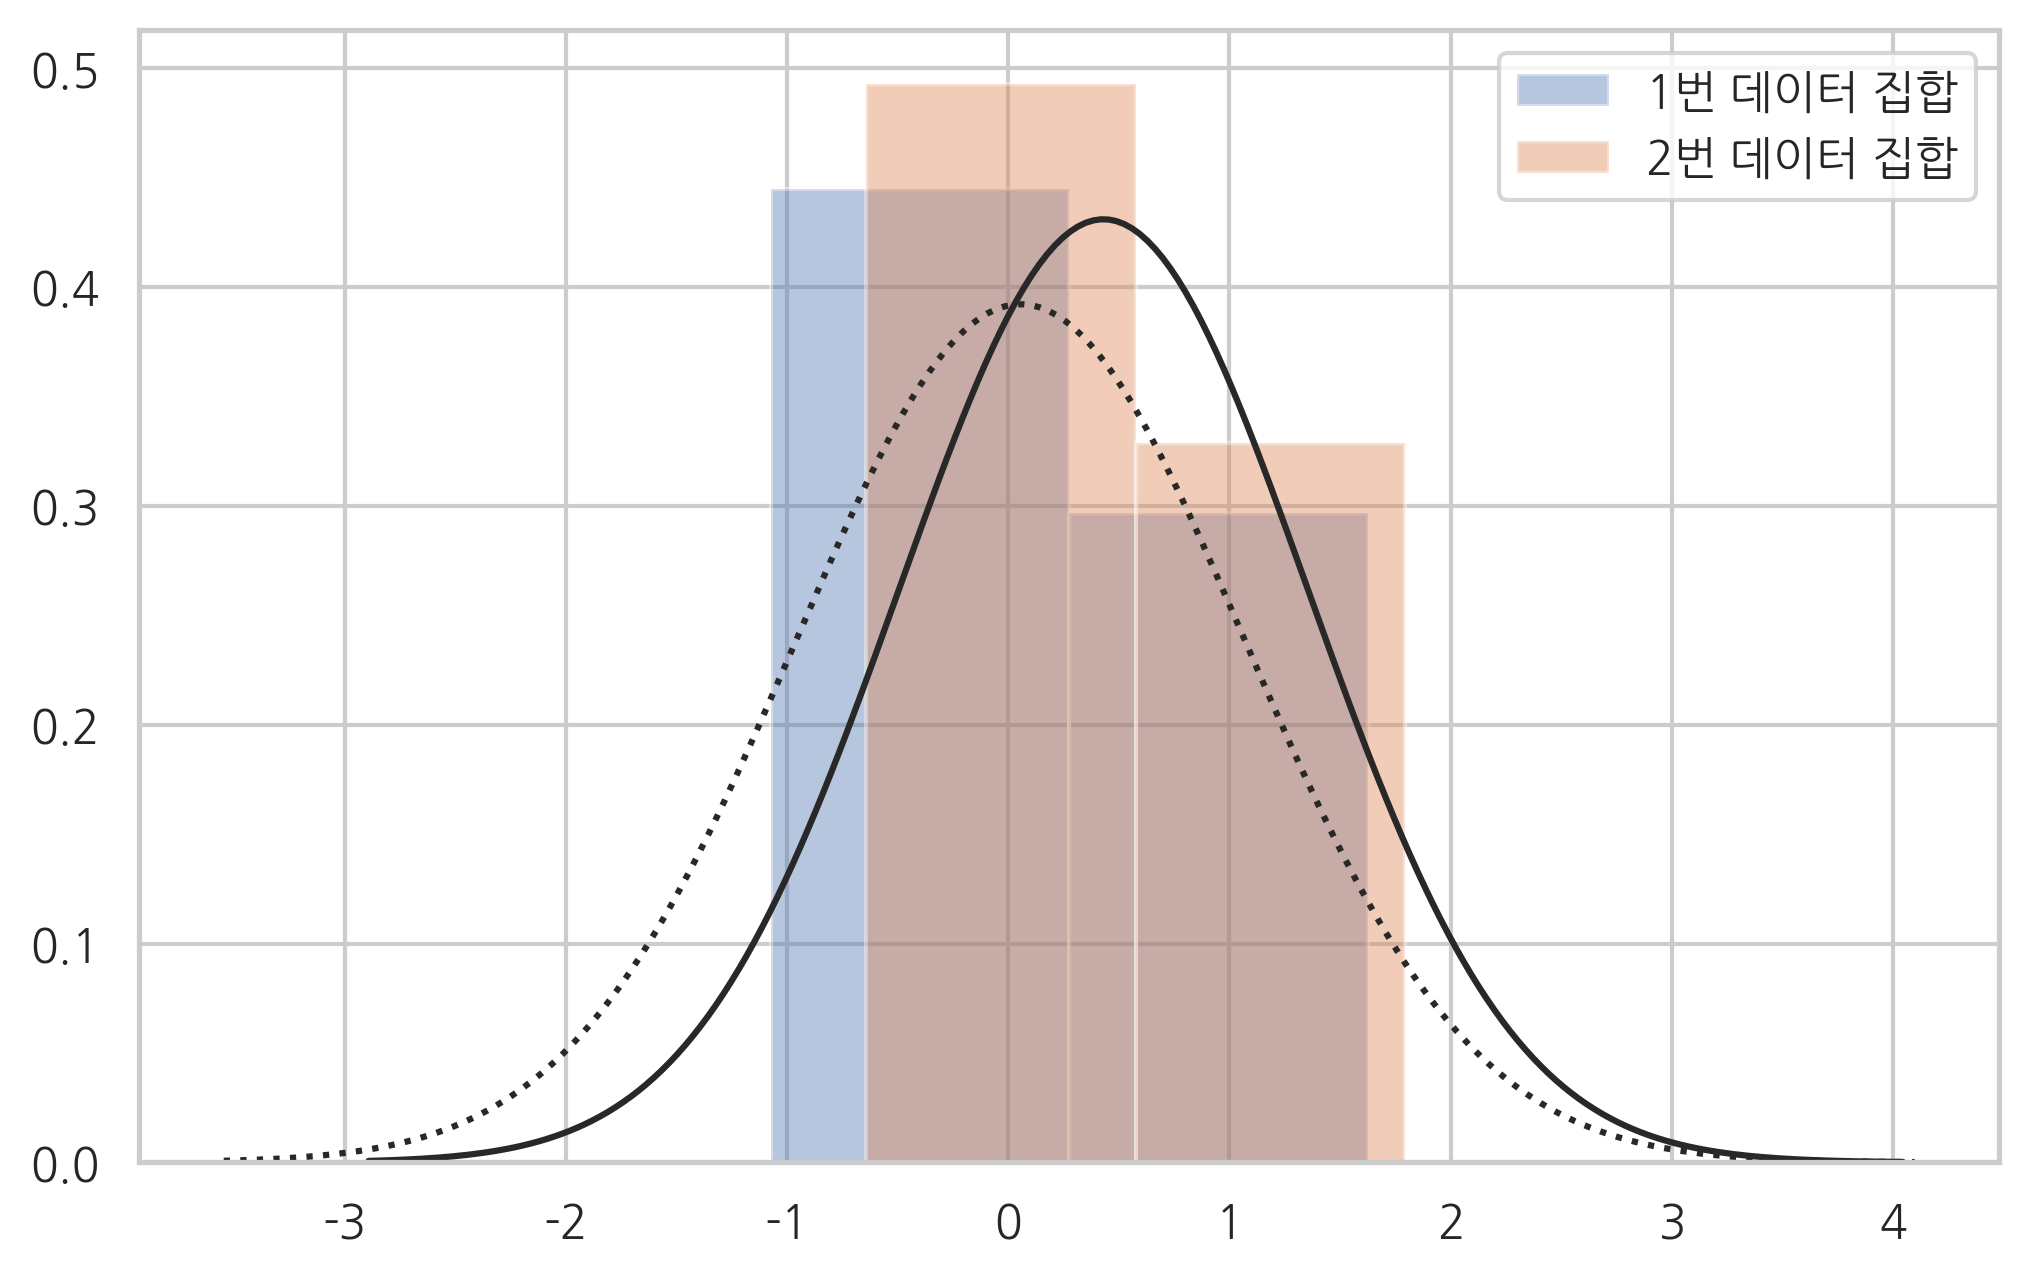

In [21]:
N = 5
mu_1 = 0
mu_2 = 0.4
np.random.seed(1)
x1 = sp.stats.norm(mu_1).rvs(N)
x2 = x1 + sp.stats.norm(mu_2, 0.1).rvs(N)

ax = sns.distplot(x1, kde=False, fit=sp.stats.norm, label="1번 데이터 집합")
ax = sns.distplot(x2, kde=False, fit=sp.stats.norm, label="2번 데이터 집합")
ax.lines[0].set_linestyle(":")
plt.legend()
plt.show()

5 개의 데이터만으로도  두 평균이 다르다는 것을 유의확률 0.48%로 알아내었음을 확인할 수 있다.

In [22]:
sp.stats.ttest_rel(x1, x2)

Ttest_relResult(statistic=-5.662482449248929, pvalue=0.0047953456833781305)

### 등분산검정 

`ttest_inds` 명령을 사용하려면 두 데이터집합의 분산이 같은지 먼저 알아내야 한다.

등분산검정(Equal-variance test)은 두 정규분포로부터 생성된 두 개의 데이터 집합으로부터 두 정규분포의 분산 모수가 같은지 확인하기 위한 검정이다. 바틀렛(bartlett), 플리그너(fligner), 레빈(levene) 검정을 주로 사용한다. 사이파이의 stats 서브패키지는 이를 위한  `bartlett`, `fligner`, `levene` 명령을 제공한다.

#### 예제

실제로 분산이 다른 두 개의 데이터 집합을 만들어보자.

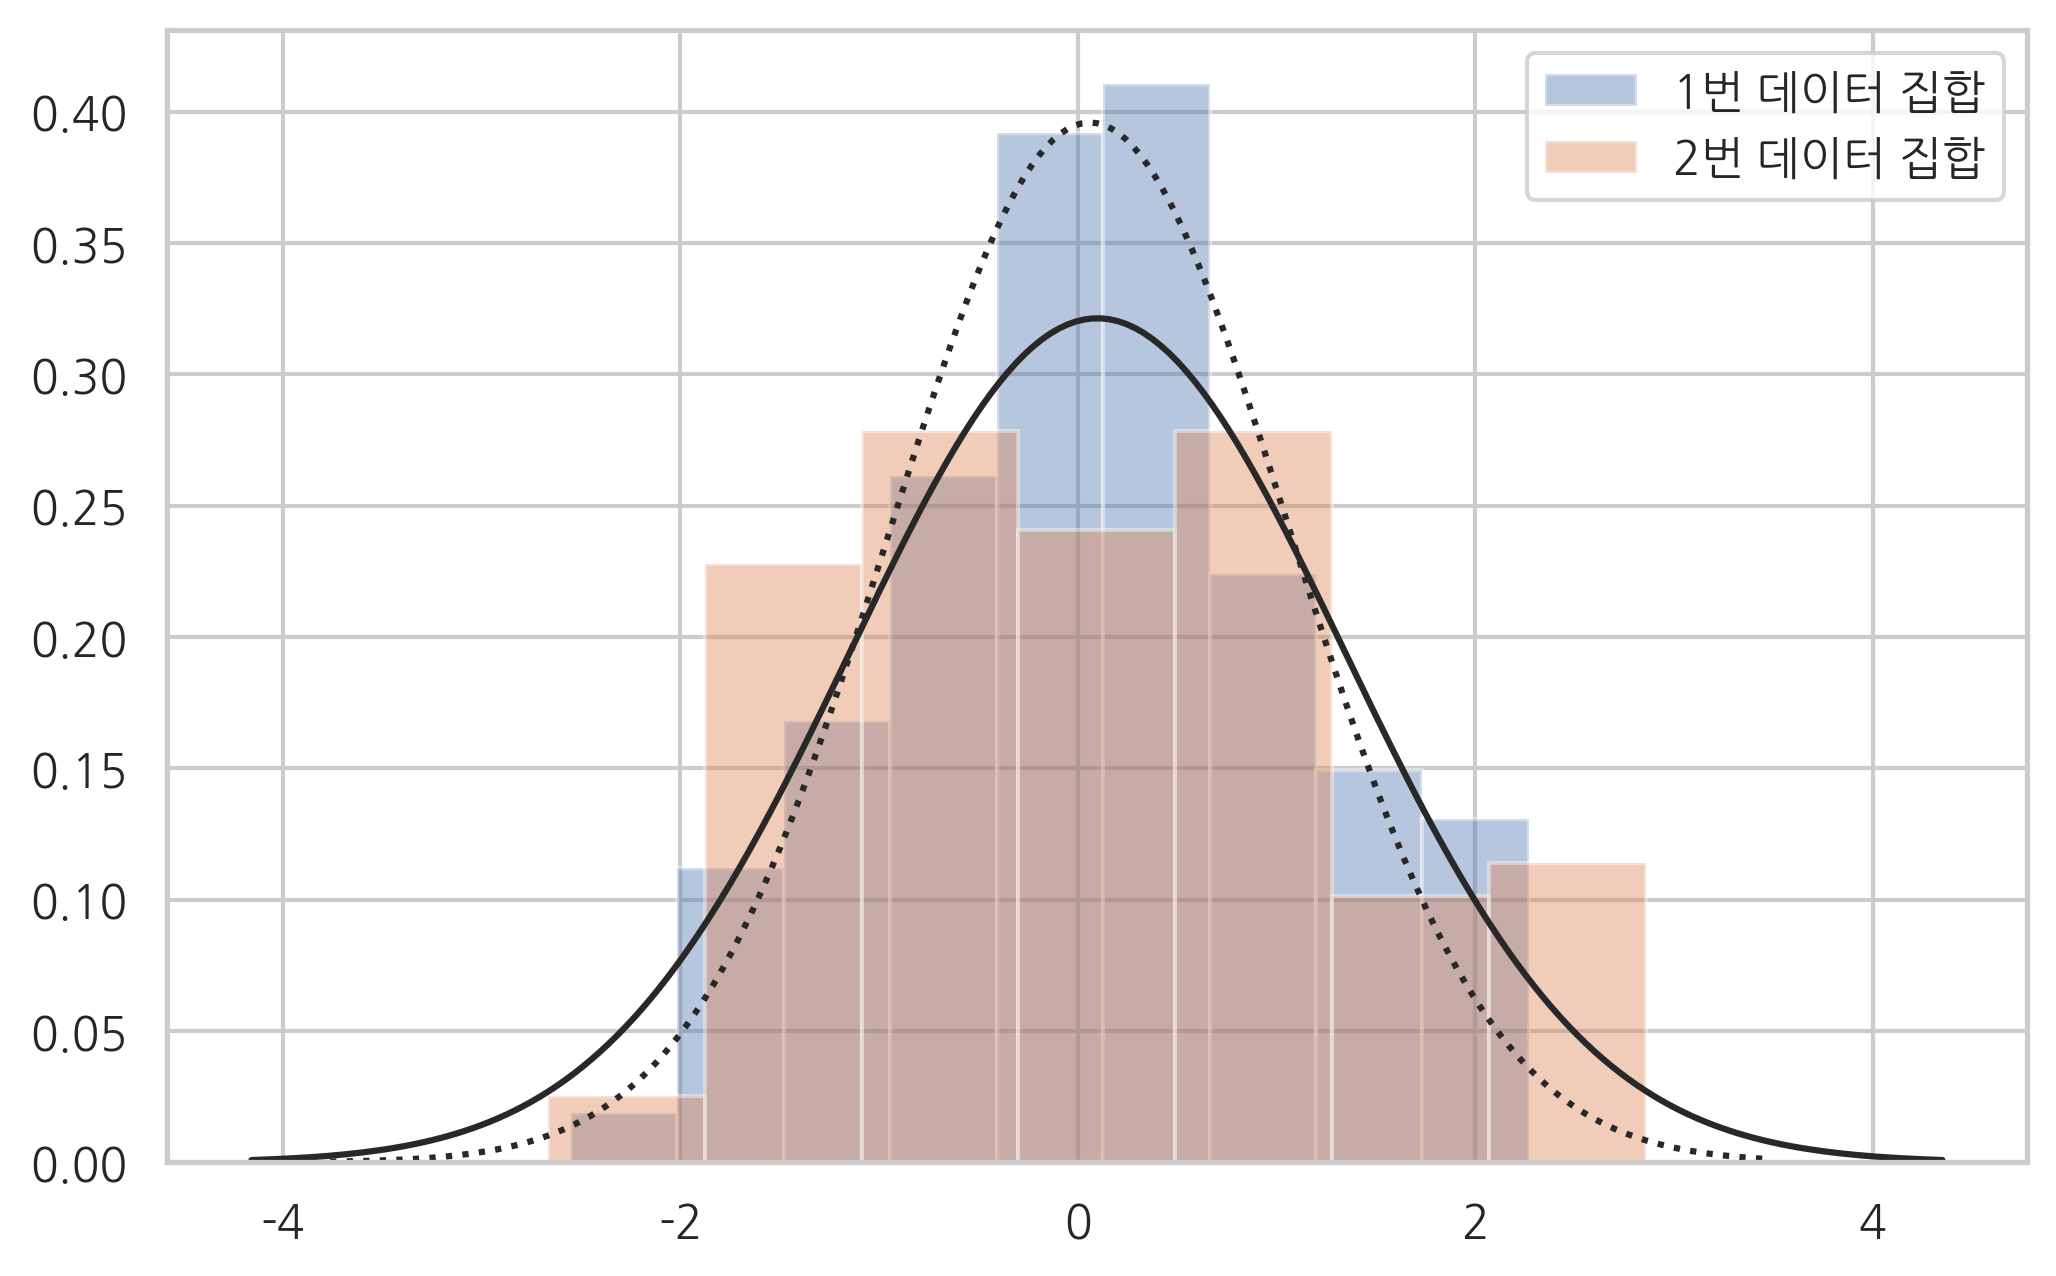

In [23]:
N1 = 100
N2 = 100
sigma_1 = 1
sigma_2 = 1.2
np.random.seed(0)
x1 = sp.stats.norm(0, sigma_1).rvs(N1)
x2 = sp.stats.norm(0, sigma_2).rvs(N2)
ax = sns.distplot(x1, kde=False, fit=sp.stats.norm, label="1번 데이터 집합")
ax = sns.distplot(x2, kde=False, fit=sp.stats.norm, label="2번 데이터 집합")
ax.lines[0].set_linestyle(":")
plt.legend()
plt.show()

다른 등분산검정을 적용한 결과는 서로 다를 수 있다. 따라서 검정 결과도 이러한 점을 고려하여 결정한다.

In [24]:
x1.std(), x2.std()

(1.0078822447165796, 1.2416003969261071)

유의수준 1% 기준에서 `bartlett` 명령의 결과는 두 데이터 집합의 분산이 같다고 계산하지만 `fligner`,  `levene` 명령은 두 데이터 집합의 분산이 다르다고 계산한다.

In [25]:
sp.stats.bartlett(x1, x2)

BartlettResult(statistic=4.253473837232266, pvalue=0.039170128783651344)

In [26]:
sp.stats.fligner(x1, x2)

FlignerResult(statistic=7.224841990409457, pvalue=0.007190150106748367)

In [27]:
sp.stats.levene(x1, x2)

LeveneResult(statistic=7.680708947679437, pvalue=0.0061135154970207925)

### 정규성검정

회귀 분석 등에서는 **확률분포가 가우시안 정규분포를 따르는지 아닌지를 확인**하는 것이 중요하다. 이러한 검정을 **정규성검정(normality test)**이라고 한다. 정규성분포는 중요한만큼 다양한 검정 방법들이 개발되어 있으며 사이파이 패키지 이외에 통계분석에 많이 사용되는 스탯츠모델즈(StatsModels) 패키지도 다양한 정규성검정 명령어를 제공한다. 

* 사이파이 에서 제공하는 정규성검정 명령어

 * 콜모고로프-스미르노프 검정(Kolmogorov-Smirnov test) : `scipy.stats.ks_2samp`
 * 샤피로-윌크 검정(Shapiro–Wilk test) : `scipy.stats.shapiro`
 * 앤더스-달링 검정(Anderson–Darling test) : `scipy.stats.anderson`
 * 다고스티노 K-제곱 검정(D'Agostino's K-squared test) : `scipy.stats.mstats.normaltest`



* StatsModels에서 제공하는 정규성검정 명령어

  * 콜모고로프-스미르노프 검정(Kolmogorov-Smirnov test) : `statsmodels.stats.diagnostic.kstest_normal`
  * 옴니버스 검정(Omnibus Normality test) : `statsmodels.stats.stattools.omni_normtest`
  * 자크-베라 검정(Jarque–Bera test) : `statsmodels.stats.stattools.jarque_bera`
  * 릴리포스 검정(Lilliefors test) : `statsmodels.stats.diagnostic.lillifors`

이 중에서 콜모고로프-스미르노프 검정(Kolmogorov-Smirnov test)은 사실 정규분포에 국한되지 않고 두 표본이 같은 분포를 따르는지 확인할 수 있는 방법이다. 예를 들어 다음처럼 두 개의 다른 정규분포에서 50개와 100개의 데이터 집합을 각각 생성해서 같은 분포에서 나왔는지 검정해보자. 

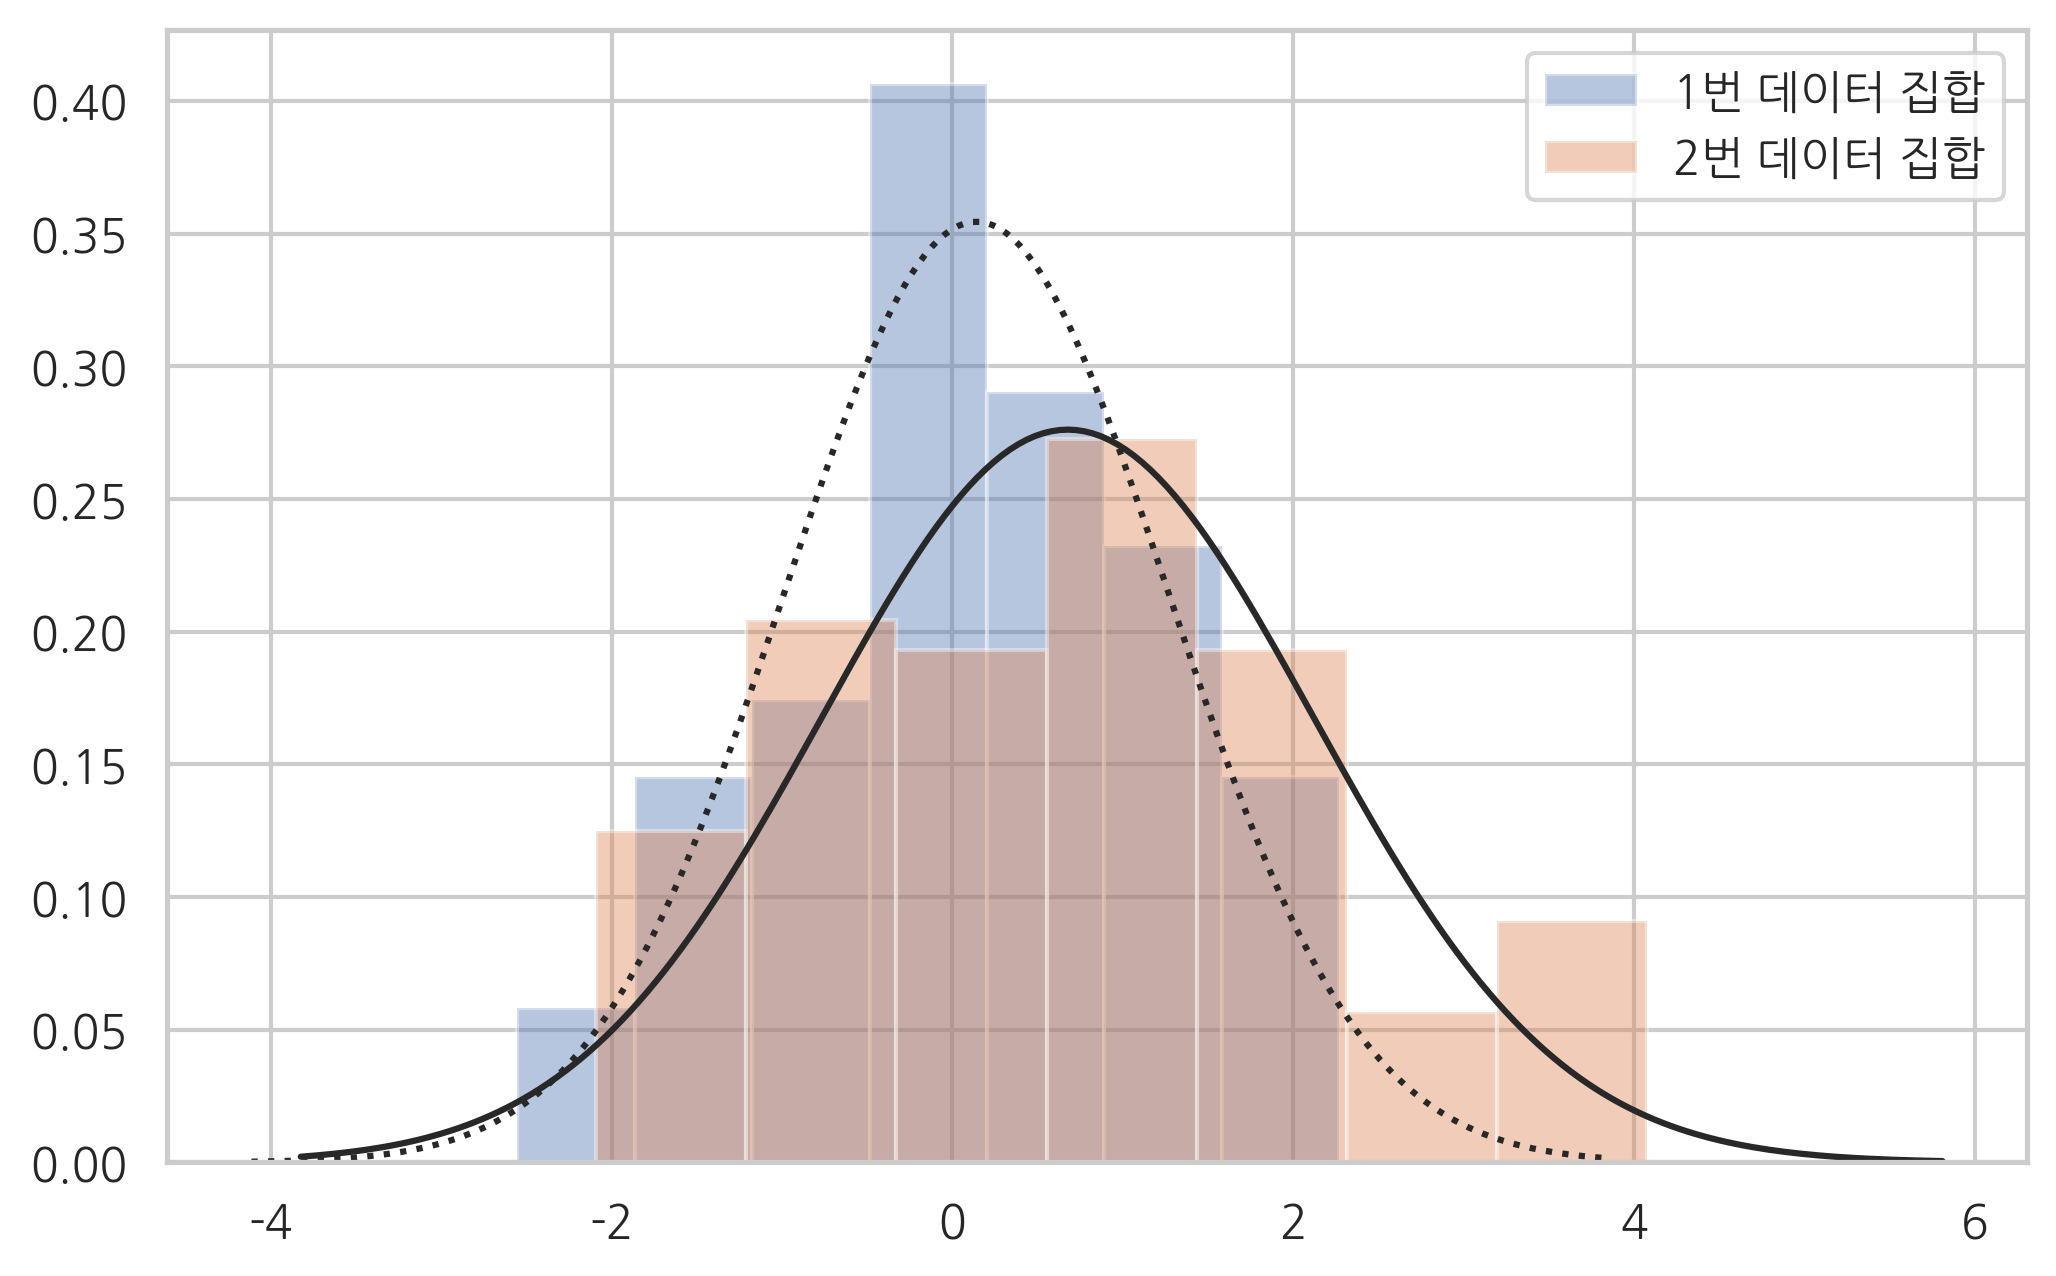

In [28]:
np.random.seed(0)
N1 = 50
N2 = 100
x1 = sp.stats.norm(0, 1).rvs(N1)
x2 = sp.stats.norm(0.5, 1.5).rvs(N2)
ax = sns.distplot(x1, kde=False, fit=sp.stats.norm, label="1번 데이터 집합")
ax = sns.distplot(x2, kde=False, fit=sp.stats.norm, label="2번 데이터 집합")
ax.lines[0].set_linestyle(":")
plt.legend()
plt.show()

In [29]:
sp.stats.ks_2samp(x1, x2)

Ks_2sampResult(statistic=0.23, pvalue=0.055507233643215415)

유의확률이 4.95%로 만약 유의 수준이 5%라면 두 분포는 서로 다른 분포라고 볼 수 있다.